In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mltools import my_convert_to_number, my_convert_to_date
from wordcloud import WordCloud
from collections import Counter
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option("display.max_rows", None, "display.max_columns", None)

sns.set(style="darkgrid")

## Load ODI

In [2]:
odi_df = pd.read_csv('ODI-2022.csv',delimiter=";")


### Number of records

In [3]:
print(len(odi_df.index))

304


### Number of attributes

In [4]:
print(len(odi_df.columns))

17


### Attributes
    

In [5]:
print((odi_df.columns))

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')


## Data treatment

### Rename columns

In [6]:
 odi_df.columns = ['time',\
                   'program',\
                   'ML',\
                   'IR',\
                   'Statistics',\
                   'DB',\
                   'Gender',\
               'Chocolate_influence',\
                   'Birthday',\
                   'neighbors',\
                   'Stand_Up',\
                   'Stress',\
              'Euros_Question',\
                   'random_number',\
                   'time_to_bed',\
                   'good_day_1',\
                   'good_day_2']
display(odi_df)

,time,program,ML,IR,Statistics,DB,Gender,Chocolate_influence,Birthday,neighbors,Stand_Up,Stress,Euros_Question,random_number,time_to_bed,good_day_1,good_day_2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food
5,4-5-2022 12:12:20,Artificial Intelligence,no,unknown,sigma,unknown,female,fat,28,0,no,48,1000,87,2130,This lecture,Sun
6,4-5-2022 12:12:26,Artificial Intelligence,yes,0,unknown,nee,male,neither,15.10.98,1,no,20,0.1,6,00:35,sunshine,happiness
7,4-5-2022 12:12:29,M Artificial Intelligence,yes,0,unknown,ja,male,neither,17 November,0,no,100,10,50,23,Rainy Day,Weekend
8,4-5-2022 12:12:29,FinTech,yes,0,mu,ja,male,neither,1995,0,no,20,100 / the number of people,42,23:00,Food,Relaxation
9,4-5-2022 12:12:29,Artificial Intelligence,no,0,mu,ja,female,fat,21-07-2000,5,yes,50,10,88,12 hours,"sun, friends and wine","relaxing, watching a show, hockey"


### Data conversion to physical values

In [7]:
#treating years as nan when less than Timestamp.min or gretaer than timestamp.max
odi_df['Birthday' ] = pd.to_datetime(odi_df['Birthday' ], errors = 'coerce')
odi_df['time'] = odi_df[['time']].applymap(my_convert_to_date, default=pd.NaT)
odi_df[['random_number', 'Stress', 'neighbors', 'Euros_Question' ]] = odi_df[['random_number', 'Stress', 'neighbors', 'Euros_Question']].applymap(my_convert_to_number)
odi_df[['ML','IR','DB','Stand_Up']] = odi_df[['ML','IR','DB', 'Stand_Up']].replace({"yes", 'ja', "1"}, True)
odi_df[['ML','IR','DB', 'Stand_Up']] = odi_df[['ML','IR','DB', 'Stand_Up']].replace({"no", 'nee', "0"}, False)
odi_df[['ML','IR','DB', 'Stand_Up']] = odi_df[['ML','IR','DB', 'Stand_Up']].replace("unknown", None)

In [8]:
odi_df['time_to_bed' ]= pd.to_datetime(odi_df['time_to_bed' ], errors = 'coerce').dt.hour
display(odi_df['time_to_bed' ])

0      23.0
1       NaN
2       NaN
3      14.0
4       7.0
5       0.0
6       0.0
7       NaN
8      23.0
9       NaN
10      NaN
11      0.0
12      NaN
13      0.0
14     12.0
15      NaN
16      NaN
17     12.0
18      NaN
19      NaN
20     20.0
21      NaN
22      3.0
23      NaN
24      NaN
25      NaN
26     23.0
27      NaN
28      NaN
29      NaN
30     12.0
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      1.0
39      9.0
40      NaN
41      NaN
42      NaN
43      NaN
44     23.0
45      NaN
46     23.0
47      NaN
48      NaN
49      NaN
50      NaN
51      1.0
52     22.0
53     23.0
54      NaN
55      NaN
56      NaN
57      NaN
58      0.0
59     13.0
60      NaN
61      NaN
62      NaN
63     23.0
64     22.0
65     15.0
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73     13.0
74      NaN
75      NaN
76      4.0
77      NaN
78      NaN
79      2.0
80     12.0
81      NaN
82     10.0
83  

### age calculation


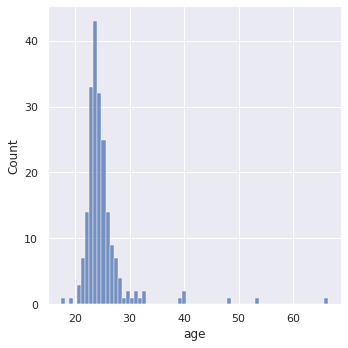

In [9]:
odi_df['age'] = odi_df['time'] - odi_df['Birthday']
#setting age more than 90 years and less than 10 to None
odi_df['age'] = odi_df['age'].dt.days/365
odi_df.loc[(odi_df['age']>90) | (odi_df['age']<10),'age']=None
sns.displot(data = odi_df, x='age')


<AxesSubplot:xlabel='time_to_bed', ylabel='age'>

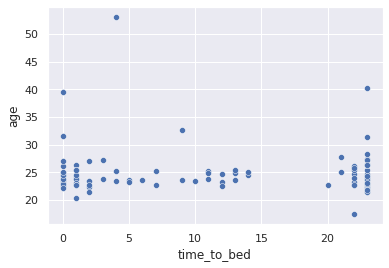

In [17]:
sns.scatterplot(data = odi_df, y='age', x = 'time_to_bed')

### Gender distribution

Gender
female                   102
gender fluid               6
intersex                   1
male                     183
not willing to answer     12
Name: Gender, dtype: int64

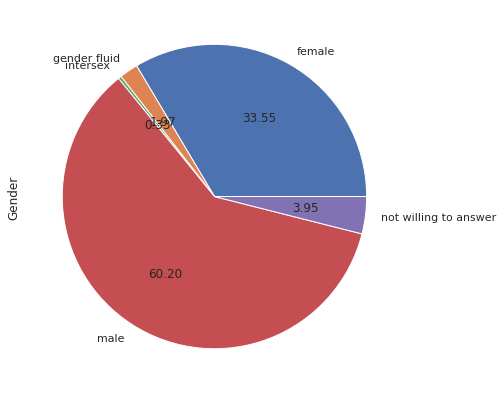

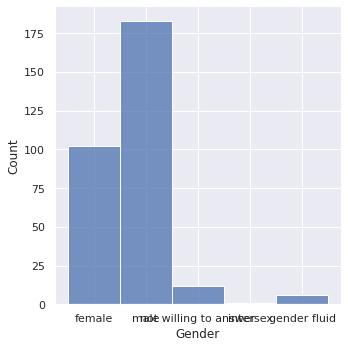

In [11]:
display(odi_df.groupby('Gender')['Gender'].count())
odi_df.groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
mask = (odi_df['Gender']!='male') & (odi_df['Gender']!='female')
odi_df['Gender'].loc[mask]
sns.displot(data=odi_df,x='Gender')


### correlations

In [12]:
odi_df.corr(method ='pearson')

,neighbors,Stress,Euros_Question,random_number,time_to_bed,age
neighbors,1.000000,-0.003453,-0.006193,-0.005803,-0.059126,0.191752
Stress,-0.003453,1.000000,-0.006156,-0.000000,0.016434,-0.003632
Euros_Question,-0.006193,-0.006156,1.000000,-0.006399,-0.203587,0.011193
random_number,-0.005803,-0.000000,-0.006399,0.000000,-0.059741,-0.014398
time_to_bed,-0.059126,0.016434,-0.203587,-0.059741,1.000000,-0.023492
age,0.191752,-0.003632,0.011193,-0.014398,-0.023492,1.000000


### Pie chart of Gender put None as random number - no rule obeing 

Text(0.5, 1.0, 'gender distribution for correct data in random number')

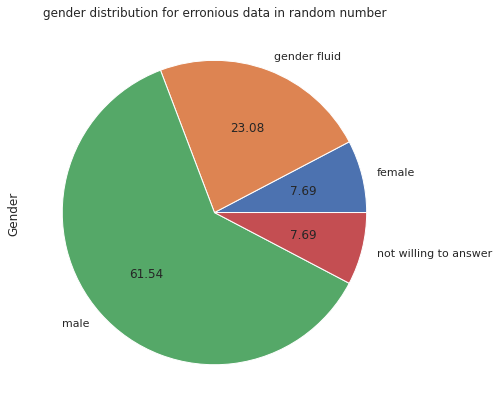

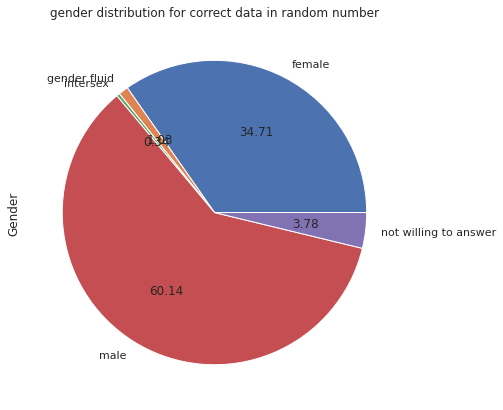

In [13]:
plt.figure(1)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for erronious data in random number')

plt.figure(2)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()==False].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for correct data in random number')


### Good day distribution

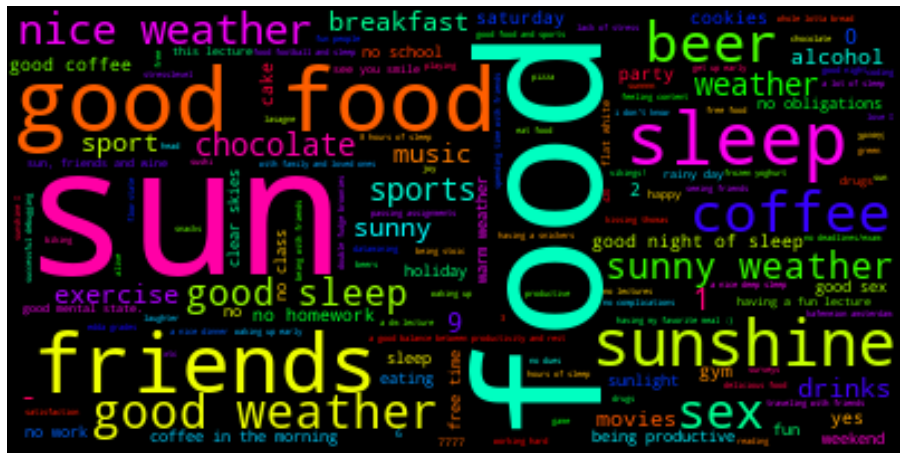

In [14]:
dictionary=Counter(list(odi_df['good_day_1'].map(str.lower))+list(odi_df['good_day_2'].map(lambda x: x.lower())))
#dd = pd.DataFrame(dictionary, index=dictionary.keys)
#display(dd)
#sns.distplot( , x=index)
cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
plt.figure(figsize=(16,12))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [15]:
frequent_itemsets= apriori(odi_df[['ML','IR','DB']], min_support=0.07, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [16]:
print(rules)

   antecedents consequents  antecedent support  consequent support   support  \
0         (IR)        (ML)            0.269737            0.628289  0.223684   
1         (ML)        (IR)            0.628289            0.269737  0.223684   
2         (DB)        (ML)            0.539474            0.628289  0.384868   
3         (ML)        (DB)            0.628289            0.539474  0.384868   
4         (IR)        (DB)            0.269737            0.539474  0.223684   
5         (DB)        (IR)            0.539474            0.269737  0.223684   
6     (IR, DB)        (ML)            0.223684            0.628289  0.190789   
7     (IR, ML)        (DB)            0.223684            0.539474  0.190789   
8     (DB, ML)        (IR)            0.384868            0.269737  0.190789   
9         (IR)    (DB, ML)            0.269737            0.384868  0.190789   
10        (DB)    (IR, ML)            0.539474            0.223684  0.190789   
11        (ML)    (IR, DB)            0.